In [1]:
# import stuff
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec
import sklearn as sk
import SingleCellSimNMF as scnmf 


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# pick session
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
(113863,) (113863, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


  0%|                                                                                                   | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|██████████                                                                                 | 1/9 [00:28<03:50, 28.87s/it]

replicate 0
replicate 1
replicate 2


 22%|████████████████████▏                                                                      | 2/9 [01:48<05:09, 44.18s/it]

replicate 0
replicate 1
replicate 2


 33%|██████████████████████████████▎                                                            | 3/9 [04:00<07:01, 70.31s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████████                                                  | 4/9 [06:59<08:35, 103.16s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████████                                        | 5/9 [11:08<09:47, 146.82s/it]

replicate 0
replicate 1
replicate 2


 67%|████████████████████████████████████████████████████████████                              | 6/9 [15:57<09:28, 189.34s/it]

replicate 0
replicate 1
replicate 2


 78%|██████████████████████████████████████████████████████████████████████                    | 7/9 [21:01<07:27, 223.80s/it]

replicate 0
replicate 1
replicate 2


 89%|████████████████████████████████████████████████████████████████████████████████          | 8/9 [26:36<04:17, 257.29s/it]

replicate 0
replicate 1
replicate 2


100%|██████████████████████████████████████████████████████████████████████████████████████████| 9/9 [32:53<00:00, 293.01s/it]


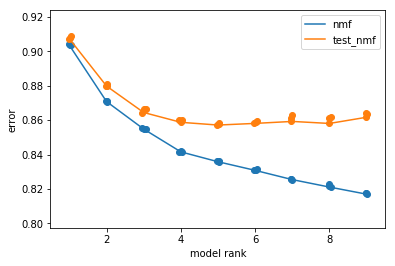

In [3]:
mouse = '4139265.5'
date = '19_02_2019'
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse[df_mouse['DateFolder'].str.match(date)].iloc[0]
ss_flat,em = scnmf.sim_triu(sess,binned=False)
results, (f,ax)=scnmf.run_ensemble(ss_flat)

In [ ]:
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4139265.5_19_02_2019_cellnmf_rmse.pdf'),format='pdf')

In [ ]:
f,ax = scnmf.plot_factors(results,3,120)
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_manuscript\\Figures",'4139265.5_19_02_2019_cellnmf_3factors.pdf'),format='pdf')

In [ ]:
W = results[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4139265.5_19_02_2019_cellnmf_weights_scatter.pdf'),format='pdf')

num aberrant ttls 0.0
29526 (29526,) (29526, 21) 83238
(83238,) (83238, 21)
frame diff 0


  0%|                                                                                                   | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|██████████                                                                                 | 1/9 [00:21<02:48, 21.07s/it]

replicate 0
replicate 1
replicate 2


 22%|████████████████████▏                                                                      | 2/9 [01:32<04:13, 36.25s/it]

replicate 0
replicate 1
replicate 2


 33%|██████████████████████████████▎                                                            | 3/9 [02:52<04:54, 49.16s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████████▍                                                  | 4/9 [04:32<05:22, 64.47s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████████▌                                        | 5/9 [06:59<05:56, 89.24s/it]

replicate 0
replicate 1
replicate 2


 67%|████████████████████████████████████████████████████████████                              | 6/9 [09:57<05:48, 116.09s/it]

replicate 0
replicate 1
replicate 2


 78%|██████████████████████████████████████████████████████████████████████                    | 7/9 [13:25<04:47, 143.52s/it]

replicate 0
replicate 1
replicate 2


 89%|████████████████████████████████████████████████████████████████████████████████          | 8/9 [16:47<02:41, 161.09s/it]

replicate 0
replicate 1
replicate 2


100%|██████████████████████████████████████████████████████████████████████████████████████████| 9/9 [20:38<00:00, 182.05s/it]


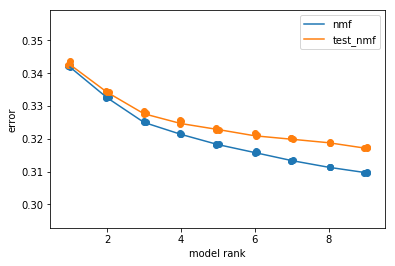

In [8]:

mouse = '4222174.1'
date = '13_06_2019';
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse[df_mouse['DateFolder'].str.match(date)].iloc[0]
ss_flat,em = scnmf.sim_triu(sess,binned=False)
results, (f,ax)=scnmf.run_ensemble(ss_flat)

In [7]:
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4222153.2_18_04_2019_cellnmf_rmse.pdf'),format='pdf')

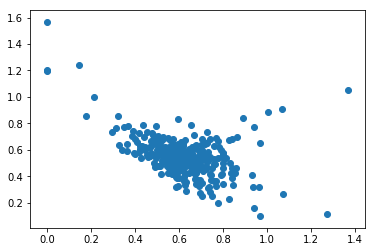

In [12]:
f,ax = plt.subplots()
W = results[2]['factors'][0][0]
ax.scatter(W[:,0],W[:,1])
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4222153.2_18_04_2019_cellnmf_weights_scatter.pdf'),format='pdf')

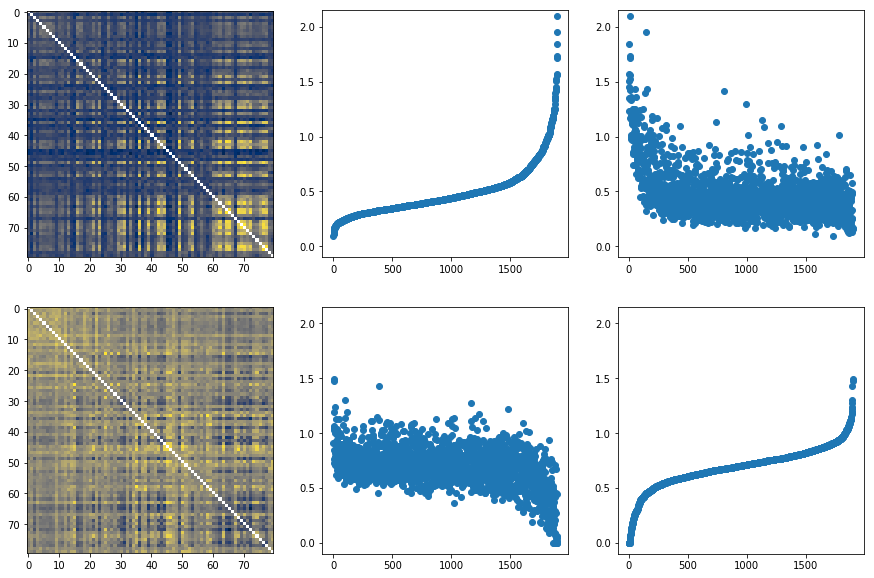

In [7]:
f,ax = scnmf.plot_factors(results,2,em.shape[0],downsample=1.)

In [18]:
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'4222174.1_18_06_2019_cellnmf_2factors.pdf'),format='pdf')

In [3]:
cellmat_rare = scnmf.build_matrix(df,['4139265.3','4139265.4','4139265.5','4222168.1'],first_sess = [5,5,5,3])
print(cellmat_rare.shape)
# results_rare,fig_rare = scnmf.run_ensemble(cellmat_rare)


4139265.3
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
(115307,) (115307, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
(109003,) (109003, 21)
frame diff 0
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
(126969,) (126969, 21)
frame diff 0
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
(110218,) (110218, 21)
frame diff 0
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
(105022,) (105022, 21)
frame diff 0
4139265.4
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
(102093,) (102093, 21)
frame diff 0
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
(95160,) (95160, 21)
frame diff 0
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
(102131,) (102131, 21)
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\PlaceCellAnalyses\SingleCellSimNMF.py:36: RuntimeWarning: invalid value encountered in true_divide
  S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]


num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
(105228,) (105228, 21)
frame diff 0
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
(100982,) (100982, 21)
frame diff 0
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
(105601,) (105601, 21)
frame diff 0
4139265.5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
(113863,) (113863, 21)
frame diff 0
num aberrant ttls 0.0
36018 (36018,) (36018, 21) 118606
(118606,) (118606, 21)
frame diff 0
num aberrant ttls 0.0
40272 (40272,) (40272, 21) 133982
(133982,) (133982, 21)
frame diff 0
num aberrant ttls 0.0
36659 (36659,) (36659, 21) 120387
(120387,) (120387, 21)
frame diff 0
num aberrant ttls 0.0
36583 (36583,) (36583, 21) 124384
(124384,) (124384, 21)
frame diff 0
4222168.1
num aberrant ttls 0.0
38388 (38388,) (38388, 21) 106947
(106947,) (106947, 21)
frame diff 0
num aberrant ttls 0.0
29491 (29491,) (29491, 21) 83119
(83119,) (83119, 21)
frame diff 0
num aberrant ttls 0.0
30135 (30135,) (30135, 21) 84894
(84894,)

In [4]:
print(cellmat_rare.shape)

(28409, 45)


In [23]:
pca = sk.decomposition.PCA()
cm_rare = pca.fit_transform(cellmat_rare)

In [24]:
print(cm_rare.shape)

(28409, 45)


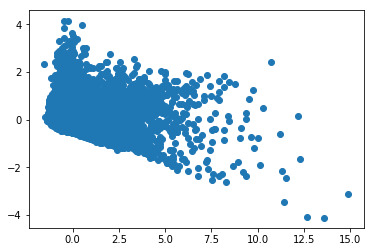

In [25]:
f,ax = plt.subplots()
ax.scatter(cm_rare[:,0],cm_rare[:,2])

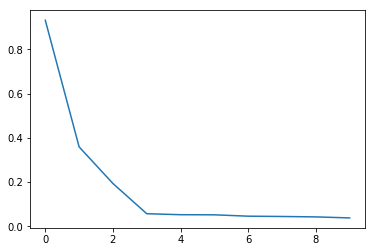

In [26]:
f,ax = plt.subplots()
ax.plot(pca.explained_variance_[:10])

In [27]:
fig_rare[0].savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_manuscript\\Figures",'rare_cellnmf_rmse.pdf'),format='pdf')

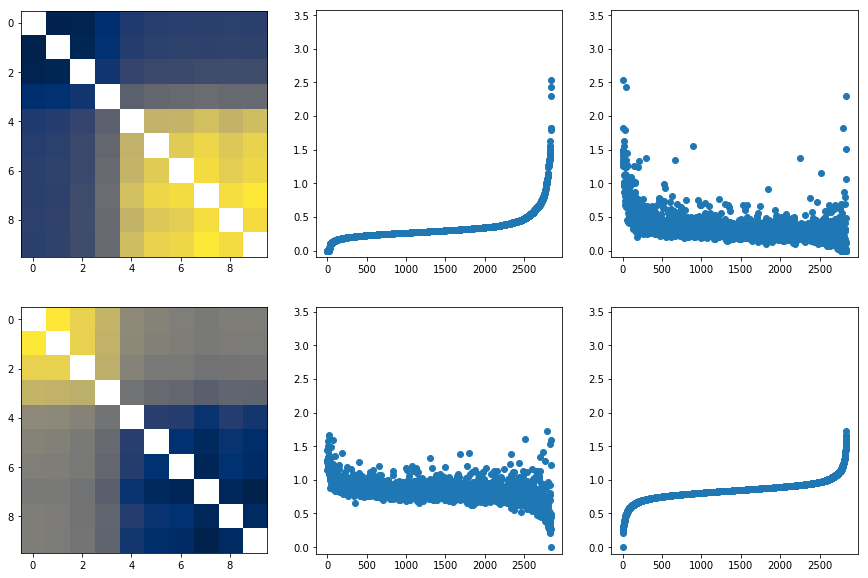

In [28]:
f_factors_rare,ax_factors_rare = scnmf.plot_factors(results_rare,2,10,downsample=.1)

In [29]:
f_factors_rare.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'rare_cellnmf_2factors.pdf'),format='pdf')

In [ ]:
W = results_rare[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'rare_cellnmf_weights_scatter.pdf'),format='pdf')

In [5]:

cellmat_fam = scnmf.build_matrix(df,['4222153.2','4222153.1','4222153.3','4222174.1','4222154.1'],first_sess=4)
print(cellmat_fam.shape)
# results_fam,fig_fam = scnmf.run_ensemble(cellmat_fam)

4222153.2
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
(116195,) (116195, 21)
frame diff 0
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
(121243,) (121243, 21)
frame diff 0
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
(129389,) (129389, 21)
frame diff 0
num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
(121463,) (121463, 21)
frame diff 0
4222153.1
num aberrant ttls 0.0
36036 (36036,) (36036, 21) 118455
(118455,) (118455, 21)
frame diff 0
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
(111444,) (111444, 21)
frame diff 0
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
(118959,) (118959, 21)
frame diff 0
4222153.3
num aberrant ttls 0.0
22769 (22769,) (22769, 21) 72892
(72892,) (72892, 21)
frame diff 0
4222174.1
num aberrant ttls 0.0
29526 (29526,) (29526, 21) 83238
(83238,) (83238, 21)
frame diff 0
num aberrant ttls 0.0
34560 (34560,) (34560, 21) 97310
(97310,) (97310, 21)
frame diff 0
num aberrant ttls 0.0
30879 (30879,) (30879, 21) 

  0%|                                                                                                   | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|██████████                                                                                 | 1/9 [00:27<03:37, 27.23s/it]

replicate 0
replicate 1
replicate 2


 22%|████████████████████▏                                                                      | 2/9 [02:42<06:58, 59.77s/it]

replicate 0
replicate 1
replicate 2


 33%|██████████████████████████████                                                            | 3/9 [06:00<10:06, 101.15s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████████                                                  | 4/9 [09:34<11:14, 134.84s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████████                                        | 5/9 [13:46<11:20, 170.13s/it]

replicate 0
replicate 1
replicate 2


 67%|████████████████████████████████████████████████████████████                              | 6/9 [18:04<09:49, 196.36s/it]

replicate 0
replicate 1
replicate 2


 78%|██████████████████████████████████████████████████████████████████████                    | 7/9 [22:54<07:29, 224.65s/it]

replicate 0
replicate 1
replicate 2


 89%|████████████████████████████████████████████████████████████████████████████████          | 8/9 [28:58<04:26, 266.33s/it]

replicate 0
replicate 1
replicate 2


100%|██████████████████████████████████████████████████████████████████████████████████████████| 9/9 [35:48<00:00, 309.39s/it]


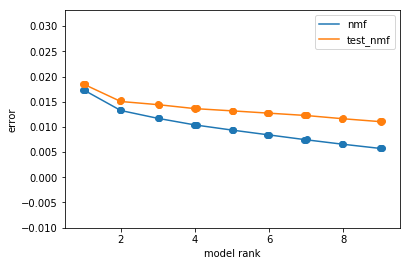

In [6]:
results_fam,fig_fam = scnmf.run_ensemble(cellmat_fam)

In [8]:
fig_fam[0].savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_manuscript\\Figures",'fam_cellnmf_rmse.pdf'),format='pdf')

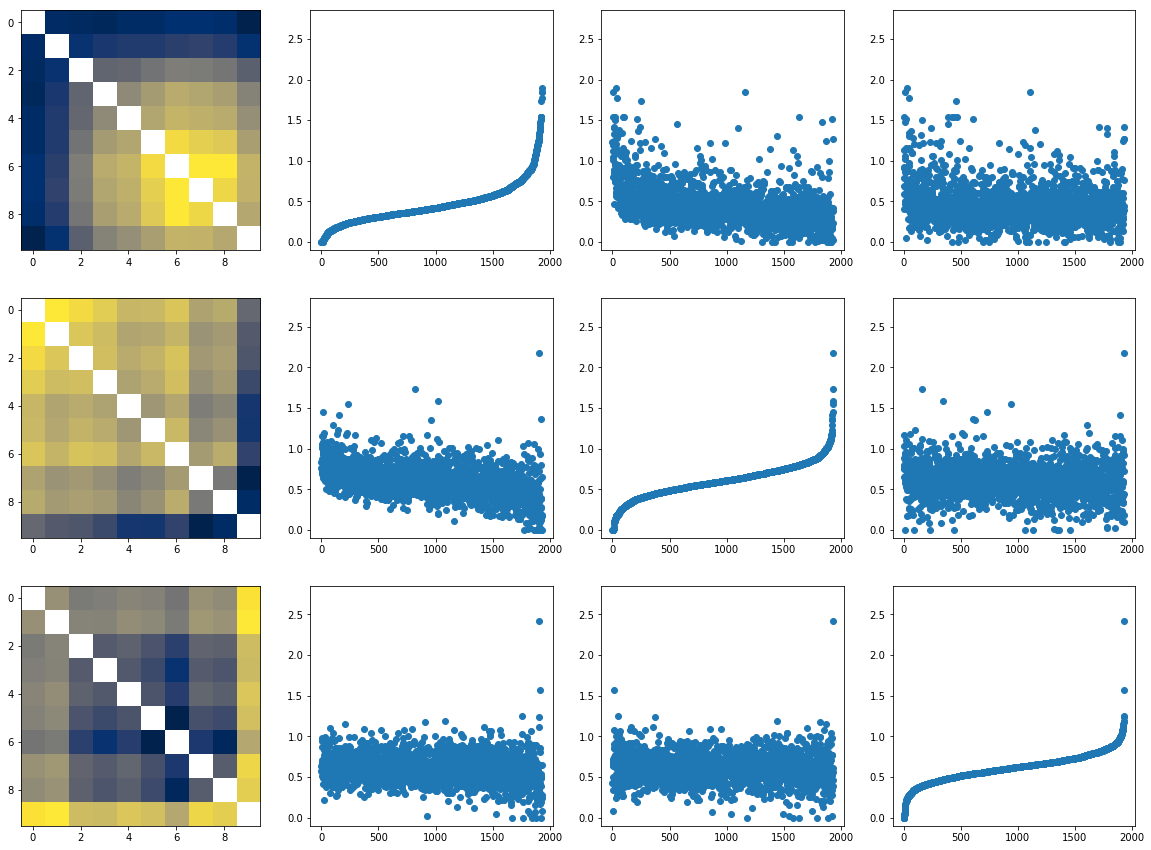

In [10]:
f_factors_fam,ax_factors_fam = scnmf.plot_factors(results_fam,3,10,downsample=.1)

In [25]:
f_factors_fam.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'fam_cellnmf_3factors.pdf'),format='pdf')

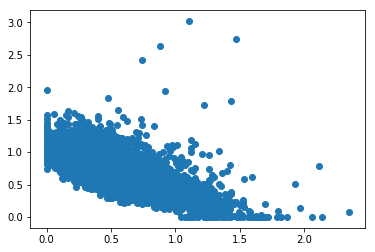

In [76]:
W = results_fam[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'fam_cellnmf_weights_scatter.pdf'),format='pdf')